In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random
import time

In [13]:
df = pd.read_csv('dataset/UNSW_NB15_training-set.csv', encoding='latin1')
df.columns

Index(['ï»¿id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [14]:
df['attack_cat'].unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [3]:
safe_fetures = ['ï»¿id', 'proto', 'service', 'sttl', 'dttl', 'swin', 'dwin', 'trans_depth', 'is_sm_ips_ports']

dangerous = ['dur', 'state', 'rate', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'tcprtt', 'synack', 'ackdat', 'response_body_len','ct_srv_src','ct_state_ttl','ct_dst_ltm','ct_src_dport_ltm','ct_dst_sport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_ftp_cmd','ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst']

# RF

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Загрузка данных
data = pd.read_csv('dataset/UNSW_NB15_training-set.csv')

In [88]:
normal_data = data[data['label']==0]
attack_data = data[data['label']==1]
print(len(normal_data), len(attack_data))

56000 119341


In [90]:
df_1 = pd.concat([attack_data.sample(frac=0.3, random_state=42), normal_data])

In [91]:
df = df_1.sample(frac=1, random_state=42).reset_index(drop=True)

In [98]:
df = data

In [99]:
# Выбор безопасных признаков и целевой переменной
safe_features = [
    'id', 'proto', 'service', 'spkts', 'dpkts', 'sbytes', 'dbytes',
    'sttl', 'dttl', 'swin', 'dwin', 'smean', 'dmean', 'trans_depth',
    'is_ftp_login', 'is_sm_ips_ports']

In [116]:
cat_features = ['proto', 'service', 'state']

#df_n = df[safe_features]

df_n = df.drop(columns=['attack_cat', 'label'])

df_encoded = pd.get_dummies(df_n, columns=cat_features)

In [117]:
X = df_encoded
y = df['attack_cat']  # или 'attack_cat', в зависимости от вашей целевой переменной

In [118]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
# Создание и обучение модели случайного леса
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
  
# Предсказание на тестовых данных
y_pred = model.predict(X_test)

In [120]:

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)

Accuracy: 0.8506
Classification Report:
                precision    recall  f1-score   support

      Analysis       0.23      0.20      0.22       393
      Backdoor       0.17      0.17      0.17       360
           DoS       0.38      0.38      0.38      2370
      Exploits       0.75      0.78      0.77      6772
       Fuzzers       0.79      0.87      0.83      3570
       Generic       1.00      0.98      0.99      8079
        Normal       0.99      0.96      0.98     11169
Reconnaissance       0.79      0.76      0.77      2098
     Shellcode       0.71      0.65      0.68       233
         Worms       1.00      0.16      0.28        25

      accuracy                           0.85     35069
     macro avg       0.68      0.59      0.61     35069
  weighted avg       0.85      0.85      0.85     35069



# XGBoost

## доработать с map

In [72]:
import xgboost as xgb

In [83]:
# Создаем словарь для замены текстовых значений на числовые
mapping = {
    'Normal': 0,
    'Backdoor': 1,
    'Analysis': 2,
    'Fuzzers': 3,
    'Shellcode': 4,
    'Reconnaissance': 5,
    'Exploits': 6,
    'DoS': 7,
    'Worms': 8,
    'Generic': 9
}

data['attack_cat'] = data['attack_cat'].replace(mapping)
# Вывод classification_report

target_names = ['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
                'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic']
print(classification_report(y_test_np, predicted_np, target_names=target_names))


# Создание и обучение модели XGBoost
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
accuracy2 = accuracy_score(y_test, y_pred)
report2 = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy2:.4f}')
print('Classification Report:')
print(report2)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7 8 9], got ['Analysis' 'Backdoor' 'DoS' 'Exploits' 'Fuzzers' 'Generic' 'Normal'
 'Reconnaissance' 'Shellcode' 'Worms']

# lgbm

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import lightgbm as lgb

# Загрузка данных

# Выбор безопасных признаков и целевой переменной
safe_features = [
    'id', 'proto', 'service', 'spkts', 'dpkts', 'sbytes', 'dbytes',
    'sttl', 'dttl', 'swin', 'dwin', 'smean', 'dmean', 'trans_depth',
    'is_ftp_login', 'is_sm_ips_ports'
]
X = data[safe_features]
y = data['label']  # или 'attack_cat', в зависимости от вашей целевой переменной

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение модели LightGBM
model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)


ValueError: pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: proto: object, service: object

# LMP

In [21]:
# Загрузка данных
data = pd.read_csv('dataset/UNSW_NB15_training-set.csv')

In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Выбор безопасных признаков и целевой переменной
safe_features = [
    'id', 'proto', 'service', 'spkts', 'dpkts', 'sbytes', 'dbytes',
    'sttl', 'dttl', 'swin', 'dwin', 'smean', 'dmean', 'trans_depth',
    'is_ftp_login', 'is_sm_ips_ports'
]
X = data[safe_features]
y = data['label']  # или 'attack_cat', в зависимости от вашей целевой переменной

# Преобразование категориальных признаков в числовые
X = pd.get_dummies(X, columns=['proto', 'service'])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Преобразование данных в формат, подходящий для CNN (например, 2D массивы)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1], 1))

# Преобразование целевой переменной в категориальный формат (если необходимо)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Преобразование в тензоры
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Создание датасетов и загрузчиков данных
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Определение модели CNN
class CNNModel(nn.Module):
    def __init__(self, input_dim):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=(3, 1))
        self.pool = nn.MaxPool2d(kernel_size=(2, 1))
        self.conv2 = nn.Conv2d(32, 64, kernel_size=(3, 1))
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * (input_dim - 4) // 2, 64)
        self.fc2 = nn.Linear(64, len(np.unique(y_train)))
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

input_dim = X_train.shape[2]
model = CNNModel(input_dim)

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}')

# Оценка модели
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.numpy())
        y_true.extend(labels.numpy())

accuracy = accuracy_score(y_true, y_pred)
report = classification_report(y_true, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x2432 and 4992x64)

# logistic regression

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Выбор безопасных признаков и целевой переменной
safe_features = [
    'id', 'proto', 'service', 'spkts', 'dpkts', 'sbytes', 'dbytes',
    'sttl', 'dttl', 'swin', 'dwin', 'smean', 'dmean', 'trans_depth',
    'is_ftp_login', 'is_sm_ips_ports'
]
X = data[safe_features]
y = data['attack_cat']  # или 'attack_cat', в зависимости от вашей целевой переменной

# Преобразование категориальных признаков в числовые
X = pd.get_dummies(X, columns=['proto', 'service'])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение логистической регрессии
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)


C:\Users\sasha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sasha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7615
Classification Report:
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       598
      Backdoor       0.50      0.00      0.01       529
           DoS       0.33      0.09      0.14      3568
      Exploits       0.60      0.85      0.70     10158
       Fuzzers       0.49      0.56      0.52      5382
       Generic       0.99      0.98      0.98     12075
        Normal       0.89      0.91      0.90     16772
Reconnaissance       0.49      0.30      0.37      3115
     Shellcode       0.00      0.00      0.00       368
         Worms       0.00      0.00      0.00        38

      accuracy                           0.76     52603
     macro avg       0.43      0.37      0.36     52603
  weighted avg       0.73      0.76      0.73     52603



C:\Users\sasha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# svm

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Выбор безопасных признаков и целевой переменной
safe_features = [
    'id', 'proto', 'service', 'spkts', 'dpkts', 'sbytes', 'dbytes',
    'sttl', 'dttl', 'swin', 'dwin', 'smean', 'dmean', 'trans_depth',
    'is_ftp_login', 'is_sm_ips_ports'
]

# Загрузка данных
start_time = time.time()

X = data[safe_features]
y = data['attack_cat']  # или 'attack_cat', в зависимости от вашей целевой переменной

# Преобразование категориальных признаков в числовые
X = pd.get_dummies(X, columns=['proto', 'service'])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение SVM
model = SVC(kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

end_time = time.time()

execution_time = end_time - start_time
print("Время выполнения:", execution_time, "секунд")   

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)


C:\Users\sasha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sasha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Время выполнения: 1183.485303401947 секунд
Accuracy: 0.7606
Classification Report:
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       598
      Backdoor       0.50      0.00      0.01       529
           DoS       0.30      0.01      0.02      3568
      Exploits       0.58      0.89      0.70     10158
       Fuzzers       0.49      0.54      0.51      5382
       Generic       0.99      0.98      0.98     12075
        Normal       0.90      0.91      0.90     16772
Reconnaissance       0.46      0.34      0.39      3115
     Shellcode       0.00      0.00      0.00       368
         Worms       0.00      0.00      0.00        38

      accuracy                           0.76     52603
     macro avg       0.42      0.37      0.35     52603
  weighted avg       0.73      0.76      0.73     52603



C:\Users\sasha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# isolation forest

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score

# Загрузка данных

# Выбор безопасных признаков и целевой переменной
safe_features = [
    'id', 'proto', 'service', 'spkts', 'dpkts', 'sbytes', 'dbytes',
    'sttl', 'dttl', 'swin', 'dwin', 'smean', 'dmean', 'trans_depth',
    'is_ftp_login', 'is_sm_ips_ports']
X = data[safe_features]
y = data['attack_cat']  # или 'attack_cat', в зависимости от вашей целевой переменной

# Преобразование категориальных признаков в числовые
X = pd.get_dummies(X, columns=['proto', 'service'])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение Isolation Forest
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_train)

# Предсказание на тестовой выборке (1 - нормальное, -1 - аномалия)
y_pred = model.predict(X_test)

# Преобразование предсказаний (-1 к 0 и 1 к 1 для сравнения с y_test)
y_pred = [1 if x == 1 else 0 for x in y_pred]

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)


Accuracy: 0.6706
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.14      0.21     16772
           1       0.70      0.92      0.79     35831

    accuracy                           0.67     52603
   macro avg       0.57      0.53      0.50     52603
weighted avg       0.62      0.67      0.61     52603



# kmeans

C:\Users\sasha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


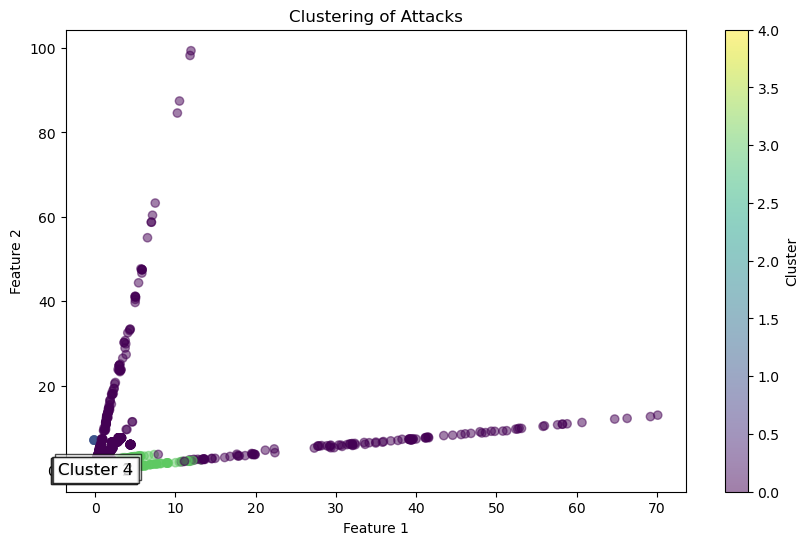

       Attack_Type  Cluster
0           Normal        3
1           Normal        0
2           Normal        0
3           Normal        4
4           Normal        2
...            ...      ...
175336     Generic        2
175337   Shellcode        3
175338     Generic        1
175339     Generic        2
175340     Generic        2

[175341 rows x 2 columns]


In [16]:
# Выбор признаков для кластеризации атак
attack_features = [
    'spkts', 'dpkts', 'sbytes', 'dbytes', 'sttl', 'dttl', 'swin', 'dwin',
    'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 
    'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
    'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
    'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'
]

X = data[attack_features]

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Выбор числа кластеров
# В данном случае выбираем количество кластеров равным 5
n_clusters = 5

# Применение K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Визуализация кластеров с подписями
plt.figure(figsize=(10, 6))

# Визуализация кластеров (может потребоваться адаптация в зависимости от признаков)
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('Clustering of Attacks')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter, label='Cluster')

# Добавление подписей к центроидам кластеров
centers = kmeans.cluster_centers_
for i, center in enumerate(centers):
    plt.text(center[0], center[1], f'Cluster {i}', fontsize=12, color='black',
             ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7))

plt.show()

# Вывод результатов кластеризации
cluster_results = pd.DataFrame({'Attack_Type': data['attack_cat'], 'Cluster': labels})
print(cluster_results)

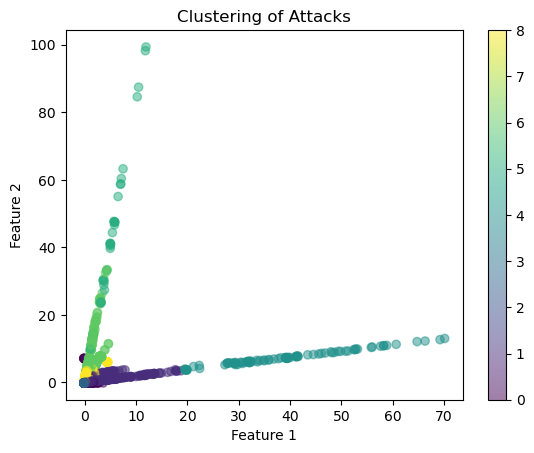

       Attack_Type  Cluster
0           Normal        1
1           Normal        8
2           Normal        8
3           Normal        2
4           Normal        3
...            ...      ...
175336     Generic        3
175337   Shellcode        1
175338     Generic        0
175339     Generic        3
175340     Generic        3

[175341 rows x 2 columns]


In [15]:

# Визуализация кластеров (может потребоваться адаптация в зависимости от признаков)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, alpha=0.5)
plt.title('Clustering of Attacks')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

# Вывод результатов кластеризации
cluster_results = pd.DataFrame({'Attack_Type': data['attack_cat'], 'Cluster': labels})
print(cluster_results)

# CNN

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# Загрузка данных
start_time = time.time()

# Выбор безопасных признаков и целевой переменной
safe_features = [
    'id', 'proto', 'service', 'spkts', 'dpkts', 'sbytes', 'dbytes',
    'sttl', 'dttl', 'swin', 'dwin', 'smean', 'dmean', 'trans_depth',
    'is_ftp_login', 'is_sm_ips_ports'
]
X = data[safe_features]
y = data['attack_cat']  # или 'attack_cat', в зависимости от вашей целевой переменной

# Преобразование категориальных признаков в числовые
X = pd.get_dummies(X, columns=['proto', 'service'])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Преобразование в тензоры PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Определение архитектуры CNN
class Net(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Инициализация модели
input_dim = X_train.shape[1]
num_classes = len(np.unique(y_train))
model = Net(input_dim, num_classes)

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
epochs = 20
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Вывод прогресса обучения
    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

end_time = time.time()

execution_time = end_time - start_time
print("Время выполнения:", execution_time, "секунд")   
        
# Оценка модели на тестовой выборке
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test, predicted.numpy())

print(f'Accuracy on test set: {accuracy:.4f}')


TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [8]:
# Преобразование тензоров PyTorch обратно в numpy массивы
y_test_np = y_test_tensor.numpy()
predicted_np = predicted.numpy()

# Вывод classification_report
print(classification_report(y_test_np, predicted_np))

              precision    recall  f1-score   support

           0       0.96      0.40      0.57     16772
           1       0.78      0.99      0.87     35831

    accuracy                           0.81     52603
   macro avg       0.87      0.70      0.72     52603
weighted avg       0.84      0.81      0.78     52603



In [16]:
# Создаем словарь для замены текстовых значений на числовые
mapping = {
    'Normal': 0,
    'Backdoor': 1,
    'Analysis': 2,
    'Fuzzers': 3,
    'Shellcode': 4,
    'Reconnaissance': 5,
    'Exploits': 6,
    'DoS': 7,
    'Worms': 8,
    'Generic': 9
}

data['attack_cat'] = data['attack_cat'].replace(mapping)
# Вывод classification_report
target_names = ['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
                'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic']
print(classification_report(y_test_np, predicted_np, target_names=target_names))


In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np

device = 'cuda'
model.to(device)

# Загрузка данных
data = pd.read_csv('dataset/UNSW_NB15_training-set.csv')

# Заменяем значения в колонке 'attack_type' с помощью метода replace
data['attack_cat'] = data['attack_cat'].replace(mapping)

# Выбор признаков и целевой переменной
features = [
    'id', 'proto', 'service', 'spkts', 'dpkts', 'sbytes', 'dbytes',
    'sttl', 'dttl', 'swin', 'dwin', 'smean', 'dmean', 'trans_depth',
    'is_ftp_login', 'is_sm_ips_ports'
]
X = data[features]
y = data['attack_cat']  # или 'label', в зависимости от вашей целевой переменной

# Преобразование категориальных признаков в числовые
X = pd.get_dummies(X, columns=['proto', 'service'])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Преобразование в тензоры PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Определение архитектуры CNN
class Net(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Инициализация модели
input_dim = X_train.shape[1]
num_classes = len(np.unique(y_train))
model = Net(input_dim, num_classes)

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Вывод прогресса обучения
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Оценка модели на тестовой выборке
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)

# Преобразование тензоров PyTorch обратно в numpy
y_test_np = y_test_tensor.numpy()
predicted_np = predicted.numpy()

# Вывод classification_report
target_names = ['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
                'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic']
print(classification_report(y_test_np, predicted_np, target_names=target_names))


KeyboardInterrupt: 